<a href="https://colab.research.google.com/github/krishbhowmick/IITB_DataScienceTraining/blob/main/IITB2.2_knn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
mydata=pd.read_csv(r"/content/drive/My Drive/IITB_ML/IITB_ML_Data/Bmi_male_female.txt")

In [ ]:
mydata

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
mydata.shape

(500, 4)

In [ ]:
#group

In [ ]:
len(mydata[mydata["Gender"]=="Male"])

245

In [ ]:
len(mydata[mydata["Gender"]=="Female"])

255

In [ ]:
# Count the feature for single column
mydata["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [ ]:
mydata.groupby(by=["Gender"]).count()

,Height,Weight,Index
Gender,,,
Female,255,255,255
Male,245,245,245


In [ ]:
mydata.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
mydata.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt

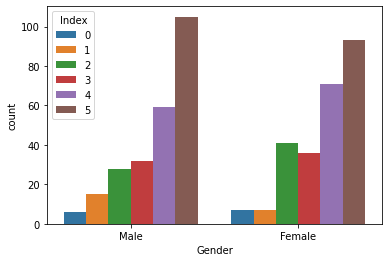

In [ ]:
# 
sb.countplot("Gender",data=mydata,hue="Index")
plt.show()

In [ ]:
# sTEP_1 SEPARATING INPUT FROM OUT PUT 

In [ ]:
mydata.head(1)

,Gender,Height,Weight,Index
0,Male,174,96,4


In [ ]:
X_feature=mydata.iloc[:,0:3]
Y_target=mydata.iloc[:,3]

In [ ]:
# 
print("Type of X_feature is {} and Type of Y_atrget is {}".format(type(X_feature),type(Y_target)))

Type of X_feature is <class 'pandas.core.frame.DataFrame'> and Type of Y_atrget is <class 'pandas.core.series.Series'>


In [ ]:
#Encode male :0 ,female:1

In [ ]:
# 
X_feature["Gender"]=X_feature["Gender"].map({"Male":1,"Female":0})

In [ ]:
X_feature

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136
498,1,150,95


In [ ]:
#Split the X_feature and  Y_target in to train and test part 
#70:30

In [ ]:
n=len(mydata)
print(n)
test_ration=int(n*.70)
test_ration

500


350

In [ ]:
# Train test split
X_train=X_feature[:test_ration]
X_test=X_feature[test_ration:]
Y_train=Y_target[:test_ration]
Y_test=Y_target[test_ration:]

In [ ]:
print(f"Sammple in Xtrain {len(X_train)} and Xtest {len(X_test)}")
print(f"Sammple in Ytrain {len(Y_train)} and Ytest {len(Y_test)}")

Sammple in Xtrain 350 and Xtest 150
Sammple in Ytrain 350 and Ytest 150


In [ ]:
# KNN MODEL 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
trainer=KNeighborsClassifier(n_neighbors=5)

In [ ]:
learner=trainer.fit(X_train,Y_train)

In [ ]:
Index_name=pd.Series(["Extremely Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

In [ ]:
#Index_name

In [ ]:
i=learner.predict([[1,196,95]])
print("Your BMI IS {}".format(Index_name[i]))

Your BMI IS 3    Overweight
dtype: object


In [ ]:
#Testing the model for unseen data :xtest

In [ ]:
Ya=Y_test  # X_test >> unseen for your model [150]
Yp=learner.predict(X_test)

In [ ]:
Yalist=list(Ya)
Yplist=list(Yp)

In [ ]:
com_table=pd.DataFrame({"Ya":Yalist,"Yp":Yplist})

In [ ]:
com_table

,Ya,Yp
0,2,3
1,2,2
2,2,2
3,5,5
4,0,0
...,...,...
145,5,5
146,4,4
147,5,5
148,5,5


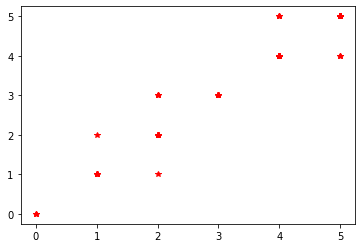

In [ ]:
plt.plot(com_table["Ya"],com_table["Yp"],'r*')
plt.show()

In [ ]:
pd.crosstab(com_table["Ya"],com_table["Yp"],margins=True)

Yp,0,1,2,3,4,5,All
Ya,,,,,,,
0,3,0,0,0,0,0,3
1,0,10,1,0,0,0,11
2,0,1,20,4,0,0,25
3,0,0,0,13,0,0,13
4,0,0,0,0,31,4,35
5,0,0,0,0,3,60,63
All,3,11,21,17,34,64,150


In [ ]:
#Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(Ya,Yp)*100

In [ ]:
print(acc)

91.33333333333333


In [ ]:
# what is k=? and what is max acc
import numpy as nP

In [ ]:
kn=int(nP.sqrt(len(X_feature)))

In [ ]:
kn=50

In [ ]:
Kn_list=range(1,50)

In [ ]:
Kn_list

range(1, 50)

In [ ]:
acc_list=[]
for i in range(1,kn):
    trainer_update=KNeighborsClassifier(n_neighbors=i)
    learner_update=trainer_update.fit(X_train,Y_train)
    Yp_upadte=learner_update.predict(X_test)
    acc_=accuracy_score(Yp_upadte,Ya)
    print("The value of k is {} and accuracy is {}".format(i,acc_))
    acc_list.append(acc_)
    acc_list_array=nP.array(acc_list)
    

The value of k is 1 and accuracy is 0.8933333333333333
The value of k is 2 and accuracy is 0.9066666666666666
The value of k is 3 and accuracy is 0.8933333333333333
The value of k is 4 and accuracy is 0.9333333333333333
The value of k is 5 and accuracy is 0.9133333333333333
The value of k is 6 and accuracy is 0.9133333333333333
The value of k is 7 and accuracy is 0.9133333333333333
The value of k is 8 and accuracy is 0.9066666666666666
The value of k is 9 and accuracy is 0.92
The value of k is 10 and accuracy is 0.9066666666666666
The value of k is 11 and accuracy is 0.9
The value of k is 12 and accuracy is 0.92
The value of k is 13 and accuracy is 0.9133333333333333
The value of k is 14 and accuracy is 0.92
The value of k is 15 and accuracy is 0.88
The value of k is 16 and accuracy is 0.8933333333333333
The value of k is 17 and accuracy is 0.8933333333333333
The value of k is 18 and accuracy is 0.9066666666666666
The value of k is 19 and accuracy is 0.86
The value of k is 20 and accur

In [ ]:
acc_list_array.max()

0.9333333333333333

In [ ]:
K=list(Kn_list)

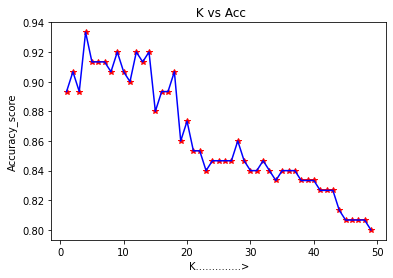

In [ ]:
plt.plot(K,acc_list,'r*')
plt.plot(K,acc_list,'b')
plt.xlabel("K..............>")
plt.ylabel("Accuracy_score")
plt.title(' K vs Acc')
plt.show()